In [2]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())
import os, sys
sys.path.append(os.getenv('PYTHONPATH'))
from config.settings import *
import torch
import torch.nn as nn

## Related work
- IEEE International Symposium on Biomedical Imaging 2021 challenge: Large-scale 3D Mitochondria Instance Segmentation
<img src="figures/isbi.png" style="width:80%"/>

## <img src="figures/pytorch.svg" style="height: 1em;">
- Free and open-source machine learning framework originally developed by Meta AI, now part of the Linux Foundation
<figure style="width: 80%">
    <img src="figures/trends.png">
    <figcaption style="text-align: center; font-size: 0.4em; margin-top: -2em; color: rgba(0,0,0,0.5)">https://paperswithcode.com/trends</figcaption>
</figure>

## Multilayer perceptron
$\hat{y} = \mathbf{w}^\top\mathbf{x} + b$

## Convnets
- Multilayer trainable filters

## Softmax
$$\mathbf{\hat{y}} = \mathrm{softmax}(\mathbf{o}) \ \ \mathrm{where} \ \ \hat{y}_{i} = \frac{\mathrm{exp}(o_i)}{\sum_{j} \mathrm{exp}(o_{j})}$$
- Maps vector of scores to probabilities
- Outputs are non-negative and sum up to 1

## Loss function
- Dissimilarity measure between model prediction and target
- Squared error in regression problems: $l(\mathbf{w}) = \frac{1}{2} (\hat{y} - y)^2$
- Cross-entropy in classification with n classes: $l(\mathbf{w}) = -\sum \limits_{i=1}^{n} y_{i}log\hat{y}_{i}$
- Dice loss: $l(\mathbf{w}) = 1 - \displaystyle \frac{2\hat{y}y}{\hat{y} + y + \gamma}$

### Loss calculation simulation

In [4]:
batch_size, num_classes, h, w = 1, 2, 4, 4
logits = torch.randn((batch_size, num_classes, h, w))
groundtruth = torch.randint(0, num_classes, (batch_size, h, w))

print('Raw network output\n', logits, '\nTarget labels\n', groundtruth)

loss = nn.CrossEntropyLoss()
print('Cross-entropy loss\n', loss(logits, groundtruth))

Raw network output
 tensor([[[[ 1.1524,  0.0488, -0.4999,  0.8023],
          [-0.7808, -1.1410,  0.7125,  0.2363],
          [ 2.1573,  0.3931, -0.0271, -0.4595],
          [-1.0653, -0.7159, -0.8533, -0.9471]],

         [[ 0.6448,  0.5050,  0.8987,  0.8557],
          [ 0.7015,  0.3970, -1.1359,  0.9902],
          [ 0.3574, -1.0381, -0.2825,  0.2334],
          [ 1.5629,  1.8593,  0.0789, -0.1686]]]]) 
Target labels
 tensor([[[1, 0, 0, 1],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [1, 0, 0, 1]]])
Cross-entropy loss
 tensor(0.9573)


In [6]:
classes = torch.arange(num_classes).reshape(1,2,1,1)
y = (groundtruth == classes).to(torch.float32)
print('One-hot encoded target labels\n', y)

softmax = nn.Softmax(dim=1)
y_hat = softmax(logits)
print('Normalized network outputs\n', y_hat)
ce_loss = (-y*torch.log(y_hat)).sum(dim=1).mean()
print('Cross-entropy loss\n', ce_loss)

One-hot encoded target labels
 tensor([[[[0., 1., 1., 0.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [0., 1., 1., 0.]],

         [[1., 0., 0., 1.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [1., 0., 0., 1.]]]])
Normalized network outputs
 tensor([[[[0.6243, 0.3879, 0.1980, 0.4867],
          [0.1851, 0.1768, 0.8639, 0.3200],
          [0.8581, 0.8071, 0.5635, 0.3334],
          [0.0673, 0.0708, 0.2825, 0.3146]],

         [[0.3757, 0.6121, 0.8020, 0.5133],
          [0.8149, 0.8232, 0.1361, 0.6800],
          [0.1419, 0.1929, 0.4365, 0.6666],
          [0.9327, 0.9292, 0.7175, 0.6854]]]])
Cross-entropy loss
 tensor(0.9573)


## Optimization
- Finding parameters that minimize the loss function: $\mathbf{w}^{*},b^{*} = \underset{\mathbf{w},b}{\operatorname{argmin}} L(\mathbf{w},b)$
- Various flavors of gradient descent
- In a nutshell, parameters are updated in the direction of the negative gradient by step size $\eta$ (learning rate): $$(\mathbf{w},b) \gets (\mathbf{w},b) - \eta \nabla L(\mathbf{w},b)$$

## Regularization
### Dropout
- Activations of a layer are randomly zeroed at probability p and the remaining are normalized.
- Prevents coadaptation. Used only during training.
- Dropout2d (SpatialDropout): entire channels are zeroed

In [1437]:
drout = nn.Dropout(p=0.8)
drout(torch.rand(10))

tensor([0.0000, 0.0000, 2.8214, 0.0000, 0.0000, 0.0000, 4.3314, 0.0000, 0.0000,
        4.1199])

## Hyperparameter optimization
- Model parameters = parameters that are updated in the training loop
- Hyperparameters comprise all the other configurables that control the learning algorithm or the structure of the model
- Goal is to find hyperparameters that minimize validation error
- One job: define the configuration space over which to optimize

## Ray <img src="figures/tune.png" style="margin-bottom: 1.5em; display: inline; height: 2em;">
- llll

## Data augmentation
- Training set is expanded by introducing random changes
- Results in better generalization to unseen data
- Automatic methods exist for choosing augmentation policy (AutoAugment, RandAugment, TrivialAugment...)
- Learning "optimal" policy for given dataset is computationally expensive and was shown to provide no benefits compared to random policy

## TrivialAugment
<img src="figures/trivialaugment.png" style="width: 40%"/>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms.functional as F
from src.data.loaders import MitoSemsegDataset, Compose, ToTensor

plt.rcParams['figure.figsize'] = [10,2]

tf = Compose([ToTensor()])
dataset = MitoSemsegDataset(root=TRAIN_ROOT, transforms=tf)
img, mask = dataset[81]

top, left, h, w = 1100, 3500, 400, 400
cropped = F.crop(img, top, left, h, w)
cropped_mask = F.crop(mask, top, left, h, w)

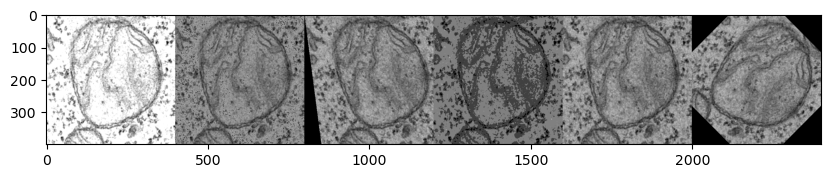

In [114]:
from torchvision.transforms import TrivialAugmentWide

augs = [TrivialAugmentWide()(cropped).squeeze() for _ in range(6)]
plt.imshow(np.concatenate(augs, axis=1), cmap='gray');

## U-Net <span style="font-size: 0.5em; font-weight: normal;">(Ronneberger et al., 2015)</span>
- A fully convolutional neural network designed for semantic segmentation
- Encoder-decoder architecture: the encoder learns an efficient representation from which the decoder builds a reconstruction
- Myriad of descendants, e.g. adopting residual blocks from ResNet or dense blocks from DenseNet

## Attention
- Database terminology: q (query), k (key), v (value)
- Dot product attention score: $$a(\mathbf{q,k}_i) = \mathbf{q^{\top}k}_i$$
- Attention weights: $$\alpha(\mathbf{q,k}_i) = \mathrm{softmax}(a(\mathbf{q,k}_i))$$
- Attention pooling: $$\mathrm{Attention}(\mathbf{q},\mathcal{D}) = \sum \limits_{i=1}^{m} \alpha(\mathbf{q,k}_i)\mathbf{v}_i$$


## Ground truth labeling
- Done in Microscopy Image Browser leveraging the Segment Anything Model (SAM)
- Instance segmentation masks for mitochondria as 8-bit TIFF images where background pixels have intensity value 0 and mitochondria non-zero
- Magnifications 3000X/4000X/5000X. 128 images from Martin's MSc thesis. ~/Kristian/dataset/